# Analysis of the MovieLens Dataset


**Team Members:**

- Salma Hisham Mohamed  _ 231000533
- Norhan Mohamed Swar   _ 231000486
- Shaden Abdelrahman Mohamed  _ 231002276
____

# `00` Import Required Dependencies

## `0.1` Install Dependencies

In [ ]:
pip install pyzipcode plotly datasketch scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 8.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 772.0/772.0 kB 13.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyzipcode: filename=pyzipcode-3.0.1-py3-none-any.whl size=1932161 sha256=8ff1f4abaef38d7b57b7e46e9eac0393fac7254a39b6cdc4115267d44dc381c2
  Stored in directory: /root/.cache/pip/wheels/33/11/bb/75313afc9ef5609e3997d374a6f6c4d48932fdb8ed8fe2ea77
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp310-cp310-linux_x86_64.whl size=3162681 sha256=9b25ca97cebe6e75a82ec450ae59fcb541b38ba7c1bb4837eac4e7d16ee41e5d
  Stored in directory: /root/.cache/pip/wheels/a5/ca/a8/4e28def53797fdc4363ca4af740db15a9c2f1595ebc51fb445
Successfully built pyzipcode scikit-surprise


## `0.2` Import Dependencies

In [ ]:
# for manipulation
import numpy as np
import pandas as pd
# visulaization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Retrieve geo coordinates from the subset of zip codes
from pyzipcode import ZipCodeDatabase
# for map reduce functions
from functools import reduce
# for hashing
from datasketch import MinHash, MinHashLSH
# preprocessing
from sklearn.preprocessing import StandardScaler
# ML
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score
# Import libraries from Surprise package
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
from scipy.sparse.linalg import svds




# `01` Read the Dataset

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Read the .dat file of '::' as delimiter into a pandas DataFrame

users_df = pd.read_csv("/content/gdrive/MyDrive/ML_Datasets/movies/users.dat", delimiter='::', header= None, engine='python', encoding='latin-1')
movies_df = pd.read_csv("/content/gdrive/MyDrive/ML_Datasets/movies/movies.dat", delimiter='::', header= None, engine='python', encoding='latin-1')
ratings_df = pd.read_csv("/content/gdrive/MyDrive/ML_Datasets/movies/ratings.dat", delimiter='::', header= None, engine='python', encoding='latin-1')

# users_df = pd.read_csv("/content/gdrive/MyDrive/Career/Master/Data Mining/ml-1m/users.dat", delimiter='::', header= None, engine='python', encoding='latin-1')
# movies_df = pd.read_csv("/content/gdrive/MyDrive/Career/Master/Data Mining/ml-1m/movies.dat", delimiter='::', header= None, engine='python', encoding='latin-1')
# ratings_df = pd.read_csv("/content/gdrive/MyDrive/Career/Master/Data Mining/ml-1m/ratings.dat", delimiter='::', header= None, engine='python', encoding='latin-1')



print("Users Dataframe info :\n", users_df.info())
print("Movies Dataframe info :\n", movies_df.info())
print("Rating Dataframe info :\n", ratings_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       6040 non-null   int64 
 1   1       6040 non-null   object
 2   2       6040 non-null   int64 
 3   3       6040 non-null   int64 
 4   4       6040 non-null   object
dtypes: int64(3), object(2)
memory usage: 236.1+ KB
Users Dataframe info :
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       3883 non-null   int64 
 1   1       3883 non-null   object
 2   2       3883 non-null   object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
Movies Dataframe info :
 None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   0  

In [ ]:
# Specify column names written in data README file
users_df_column_names = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
movies_df_column_names = ['MovieID', 'Title', 'Genres']
ratings_df_column_names = ['UserID', 'MovieID', 'Rating', 'Timestamp']

# Assign column names to the DataFrame
users_df.columns = users_df_column_names
movies_df.columns = movies_df_column_names
ratings_df.columns = ratings_df_column_names

In [ ]:
# Merge dataframes
merged_df = pd.merge(pd.merge(ratings_df, users_df, on='UserID'), movies_df, on='MovieID')
merged_df.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


# `02` Exploratory Data Analysis

In [ ]:
merged_df.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


In [ ]:
# check Nulls
nulls_df = merged_df.isnull().sum().sort_values(ascending=False).reset_index().rename(columns = { 0 : "Nulls_Count"})
nulls_df[nulls_df['Nulls_Count'] > 0]

,index,Nulls_Count


In [ ]:
# Check Duplicates
merged_df.duplicated().sum()

0

M    4331
F    1709
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

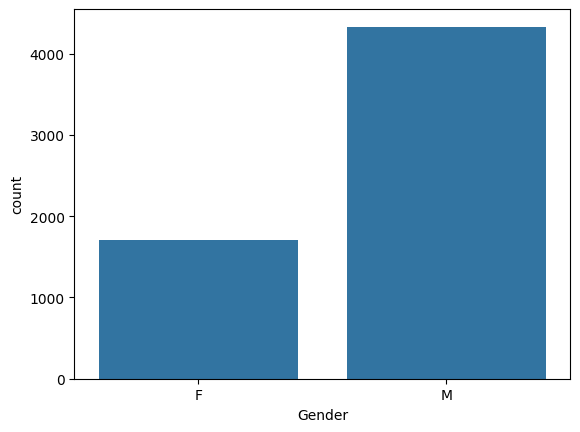

In [ ]:
# Print the value counts with the gender feature
print(users_df['Gender'].value_counts())
sns.countplot(x='Gender', data=users_df)

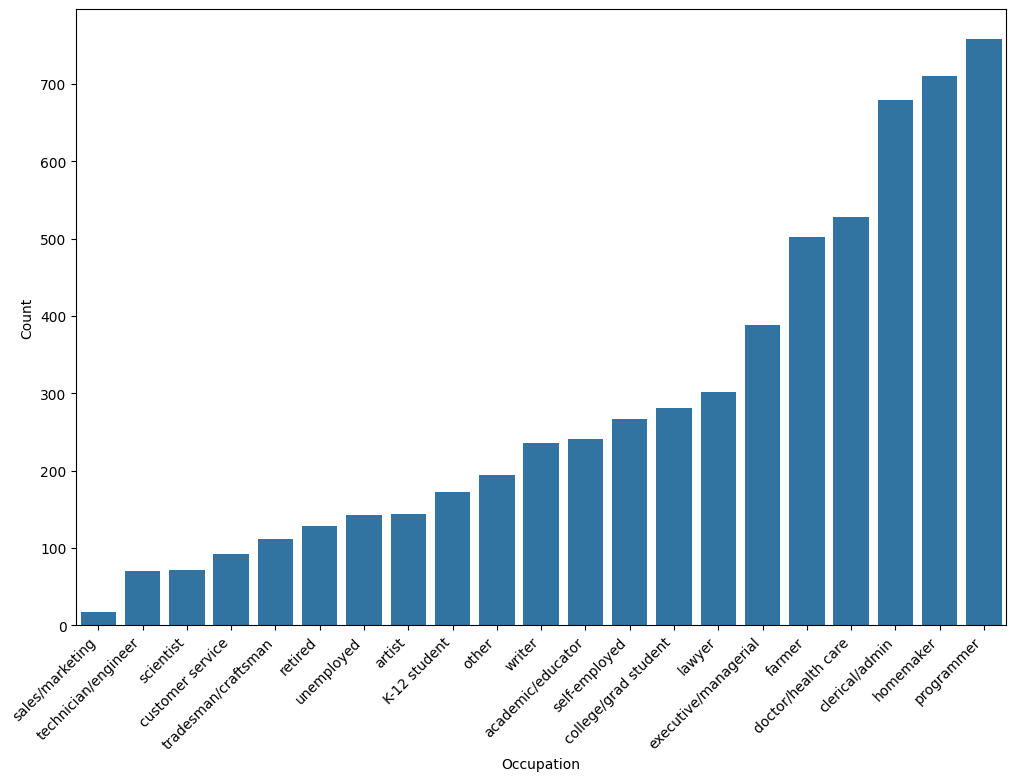

In [ ]:
# Getting the Occupation values from the data README file
Occupation_labels = ["other" ,"academic/educator" ,"artist" ,"clerical/admin"
                    ,"college/grad student" ,"customer service" ,"doctor/health care" ,"executive/managerial"
                    ,"farmer" ,"homemaker" ,"K-12 student" ,"lawyer" ,"programmer"
                    ,"retired" ,"sales/marketing" ,"scientist" ,"self-employed" ,"technician/engineer"
                    ,"tradesman/craftsman" ,"unemployed" ,"writer"]

# Create an Occupation DataFrame with counts and Occupation labels
Occupation_cnt_df = users_df['Occupation'].value_counts().reset_index()
# Remane the columns
Occupation_cnt_df.columns = ['Occupation', 'Count']
# Map the original 'Occupation' values with Occupation labels for better readability
Occupation_cnt_df['Occupation'] = Occupation_cnt_df['Occupation'].map(dict(zip(users_df['Occupation'].unique(), Occupation_labels)))
# Sort the DataFrame by the 'Count' column
Occupation_cnt_df = Occupation_cnt_df.sort_values(by='Count')
# Create a bar plot using the Occupation DataFrame
plt.figure(figsize=(12, 8))
sns.barplot(x='Occupation', y='Count', data=Occupation_cnt_df)
# Show the plot
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
Occupation_cnt_df.head()

,Occupation,Count
20,sales/marketing,17
19,technician/engineer,70
18,scientist,72
17,customer service,92
16,tradesman/craftsman,112


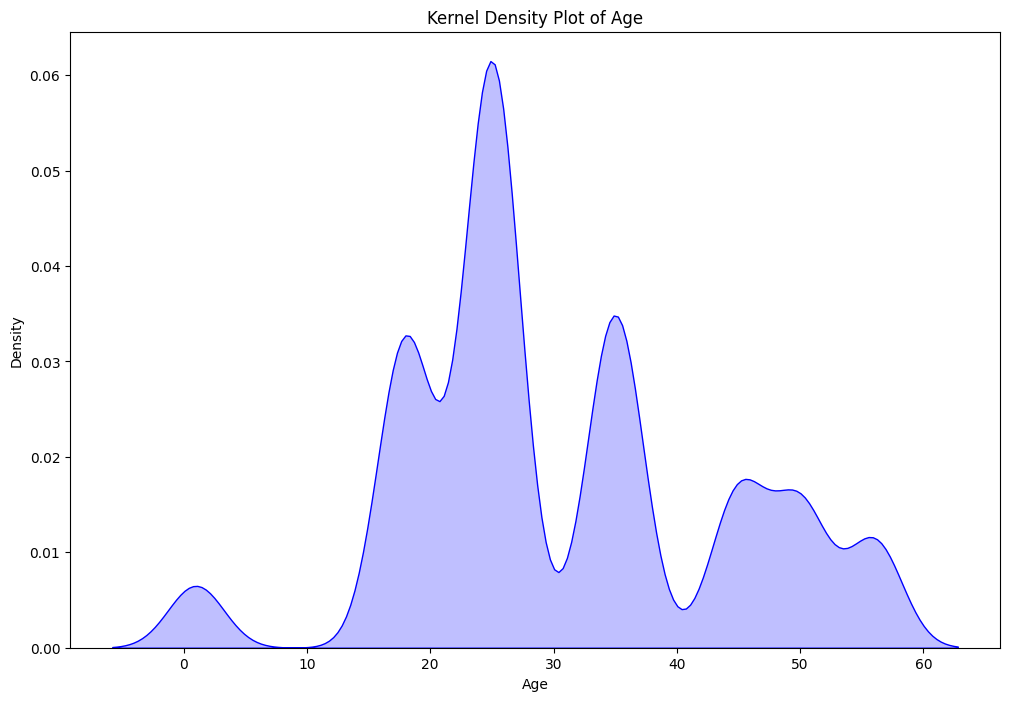

In [ ]:
# Examine the 'Age' ranges in our Data that watch movies the most.
plt.figure(figsize=(12, 8))
sns.kdeplot(data=users_df, x='Age', fill=True, color='blue')

plt.title('Kernel Density Plot of Age')
plt.show()

In [ ]:
merged_df['Genres'].value_counts()

Comedy                       116883
Drama                        111423
Comedy|Romance                42712
Comedy|Drama                  42245
Drama|Romance                 29170
                              ...  
Drama|Romance|Western            29
Children's|Fantasy               27
Comedy|Film-Noir|Thriller         5
Film-Noir|Horror                  2
Fantasy                           1
Name: Genres, Length: 301, dtype: int64

After conducting a light exploratory data analysis (EDA)


- it's evident that the majority of views come from individuals in the programming occupation.
- the most active movie watchers fall within the age range of 20 to 30.
- dataset is skewed towards men.
- However the dataset is skewed towards men, Surprisingly, the top-viewed genre is comedy. 😄





# Clustering

In [ ]:
# Select the relevant columns for clustering
ratings = merged_df[['UserID', 'MovieID', 'Rating']]

# Pivot the data to have UserID as rows and MovieID as columns
pivot_table = ratings.pivot(index='UserID', columns='MovieID', values='Rating')

# Fill missing values with 0 (unrated movies)
pivot_table.fillna(0, inplace=True)

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(pivot_table)



In [ ]:
# Find the optimal number of clusters using the elbow method
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

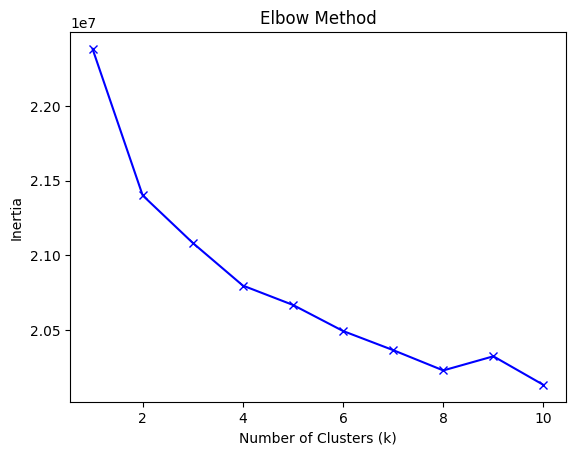

In [ ]:
# Plot the inertia values
plt.plot(k_values, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()



In [ ]:
# Choose the optimal number of clusters based on the elbow plot
k = 4  # Adjust this based on the elbow plot

# Perform K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(normalized_data)

# Assign cluster labels to the original dataset
merged_df['Cluster'] = cluster_labels[merged_df['UserID'].values - 1]

# Group movies by MovieID and find the most frequent cluster in each group
movie_clusters = merged_df.groupby('MovieID')['Cluster'].agg(lambda x: x.value_counts().index[0])
movie_clusters = movie_clusters.reset_index()

# Merge the movie_clusters DataFrame with the original data
merged_df = pd.merge(merged_df, movie_clusters, on='MovieID', how='left')

# Rename the column to 'ClusterNumber'
merged_df.rename(columns={'Cluster_y': 'ClusterNumber'}, inplace=True)

# Print the DataFrame with the added 'ClusterNumber' column for each movie
print(merged_df[['MovieID', 'ClusterNumber']])



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


         MovieID  ClusterNumber
0           1193              1
1           1193              1
2           1193              1
3           1193              1
4           1193              1
...          ...            ...
1000204     2198              0
1000205     2703              0
1000206     2845              0
1000207     3607              1
1000208     2909              1

[1000209 rows x 2 columns]


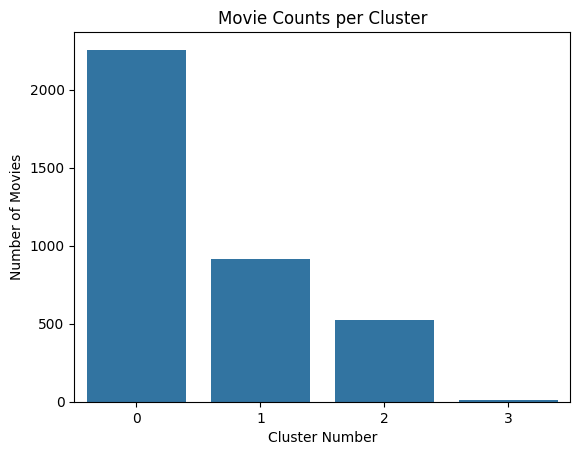

In [ ]:
import seaborn as sns

# Count movie IDs within each cluster
cluster_movie_counts = merged_df.groupby("ClusterNumber")["MovieID"].nunique()

sns.barplot(x=cluster_movie_counts.index, y=cluster_movie_counts.values)
plt.xlabel("Cluster Number")
plt.ylabel("Number of Movies")
plt.title("Movie Counts per Cluster")
plt.show()



In [ ]:
import pandas as pd

# Group data by cluster number and count the movies in each cluster
cluster_counts = merged_df.groupby('ClusterNumber')['MovieID'].count()

# Print the count of movies in each cluster
print("Cluster Counts:")
print(cluster_counts)

# Group data by cluster number and get the unique movie IDs in each cluster
cluster_movies = merged_df.groupby('ClusterNumber')['MovieID'].unique()

# Print the movie IDs in each cluster
print("\nMovie IDs in Each Cluster:")
for cluster_num, movie_ids in cluster_movies.items():
    print(f"Cluster {cluster_num}: {movie_ids}")

Cluster Counts:
ClusterNumber
0    594847
1    381201
2     24145
3        16
Name: MovieID, dtype: int64

Movie IDs in Each Cluster:
Cluster 0: [ 914 1287  594 ... 2198 2703 2845]
Cluster 1: [1193  661 3408 2355 1197 2804  919  595 1035 2791 2687 1270  527 1097
 1721  745 3186 1566  588 1907 2762  150    1 1961 2692  260 1207 2028
  531 3114  608 1537  648 2628 2916 1210 1213 3578 2881 3030 1253 1610
  902 1259 3147 1544 1188  110 2490 3471  589 3654 2858 1225  265 1408
  480 1265 1196 1198  593 2359 2571 2396 2501  457  920 1527 3418 3095
  780 1784 2943  318 1968 1244  356 3893 1247 3534 2997 1291 1580 1304
 1136 1214 1036 3702 2366 1387 1240 2987 2333 2337  860 2770 1250 3793
 3799 2700  296 1617 3079 2560 3006 1046   50 3081  377 3083 3513 2428
 3514 1912 2716 2289 1127 3016 2070 1704 3163 2291 2721 1923 2580 3744
  968  896 1788 3176 2806 2734 2013 2599 2959  908 1653 3113 1513 1089
  913 3409 2607 2390 1734 3624 2395 2683 2759   24 3051 1093 2188 2908
   32 3786   34   36 3717 1

In [ ]:
from sklearn.manifold import TSNE

# Select relevant features for dimensionality reduction
features = ["ClusterNumber", "MovieID"]  # Replace with desired features

tsne = TSNE(n_components=2, random_state=42)  # Adjust parameters as needed
reduced_data = tsne.fit_transform(merged_df[features])

plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=merged_df["ClusterNumber"], cmap="viridis")
plt.title("t-SNE Visualization of Clusters")
plt.show()


In [ ]:
merged_df

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres,...,Cluster_x,ClusterNumber,Cluster_x,ClusterNumber,Cluster_x,ClusterNumber,Cluster_x,ClusterNumber,Cluster_x,ClusterNumber
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama,...,1,1,1,1,1,1,1,1,1,1
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama,...,1,1,1,1,1,1,1,1,1,1
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama,...,1,1,1,1,1,1,1,1,1,1
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama,...,1,1,1,1,1,1,1,1,1,1
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary,...,1,0,1,0,1,0,1,0,1,0
1000205,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama,...,0,0,0,0,0,0,0,0,0,0
1000206,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama,...,0,0,0,0,0,0,0,0,0,0
1000207,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western,...,1,1,1,1,1,1,1,1,1,1


In [ ]:
merged_df.to_csv('Clustering_data.csv')

# Task 2

In [ ]:
import pandas as pd
import random
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import community
import matplotlib.pyplot as plt


In [ ]:
ratings_df = pd.read_csv('C:/Users/Lap Smart/Desktop/ml-1m/ratings.dat', sep='::', encoding='latin-1')
users_df = pd.read_csv('C:/Users/Lap Smart/Desktop/ml-1m/users.dat', sep='::' ,encoding='latin-1')
movies_df = pd.read_csv('C:/Users/Lap Smart/Desktop/ml-1m/movies.dat', sep='::',encoding='latin-1')

# Specify column names written in data README file
users_df_column_names = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']
movies_df_column_names = ['MovieID', 'Title', 'Genres']
ratings_df_column_names = ['UserID', 'MovieID', 'Rating', 'Timestamp']

# Assign column names to the DataFrame
users_df.columns = users_df_column_names
movies_df.columns = movies_df_column_names
ratings_df.columns = ratings_df_column_names

# Merge dataframes
merged_df = pd.merge(pd.merge(ratings_df, users_df, on='UserID'), movies_df, on='MovieID')
merged_df

C:\Users\Lap Smart\AppData\Local\Temp\ipykernel_17836\2077379729.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  ratings_df = pd.read_csv('C:/Users/Lap Smart/Desktop/ml-1m/ratings.dat', sep='::', encoding='latin-1')
C:\Users\Lap Smart\AppData\Local\Temp\ipykernel_17836\2077379729.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  users_df = pd.read_csv('C:/Users/Lap Smart/Desktop/ml-1m/users.dat', sep='::' ,encoding='latin-1')
C:\Users\Lap Smart\AppData\Local\Temp\ipykernel_17836\2077379729.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separa

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
0,2,1357,5,978298709,M,56,16,70072,Shine (1996),Drama|Romance
1,8,1357,4,978230800,M,25,12,11413,Shine (1996),Drama|Romance
2,10,1357,5,978227625,F,35,1,95370,Shine (1996),Drama|Romance
3,18,1357,5,978156876,F,18,3,95825,Shine (1996),Drama|Romance
4,33,1357,4,978109488,M,45,3,55421,Shine (1996),Drama|Romance
...,...,...,...,...,...,...,...,...,...,...
998075,5949,2198,5,958846401,M,18,17,47901,Modulations (1998),Documentary
998076,5675,2703,3,976029116,M,35,14,30030,Broken Vessels (1998),Drama
998077,5780,2845,1,958153068,M,18,17,92886,White Boys (1999),Drama
998078,5851,3607,5,957756608,F,18,20,55410,One Little Indian (1973),Comedy|Drama|Western


In [ ]:
# Map function for Average Ratings
def map_average_ratings(row):
    key = row.get('MovieID', 'Unknown')
    value = {'Rating': row.get('Rating', 0), 'TotalUsers': 1}
    return (key, value)

# Reduce function for Average Ratings
def reduce_average_ratings(mapped_data):
    result = []
    grouped_data = {}

    for movie_id, rating_info in mapped_data:
        if movie_id not in grouped_data:
            grouped_data[movie_id] = {'Rating': 0, 'TotalUsers': 0}

        grouped_data[movie_id]['Rating'] += rating_info['Rating']
        grouped_data[movie_id]['TotalUsers'] += rating_info['TotalUsers']

    for movie_id, info in grouped_data.items():
        avg_rate = info['Rating'] / info['TotalUsers']
        result.append({"MovieID": movie_id, "AvgRating": avg_rate, "TotalRatings": info['TotalUsers']})

    return result

In [ ]:
# Map
average_ratings_mapped = [map_average_ratings(row) for index, row in merged_df[['MovieID', 'Rating']].iterrows()]
# Reduce
average_ratings_reduced = reduce_average_ratings(average_ratings_mapped)

# Convert the result to a DataFrame
result_df = pd.DataFrame(average_ratings_reduced)
result_df

,MovieID,AvgRating,TotalRatings
0,1357,3.806569,548
1,3068,3.865435,379
2,1537,4.137143,350
3,647,3.553288,441
4,2194,4.007986,1127
...,...,...,...
3700,2198,4.000000,2
3701,2703,3.000000,1
3702,2845,1.000000,1
3703,3607,5.000000,1


In [ ]:
# Merge result_df with movies_df to get movie names
movies_df = pd.merge(result_df, movies_df[['MovieID', 'Title', 'Genres']], on='MovieID')

# Select top 10 movies with more than 500 ratings
sorted_movies = movies_df[movies_df['TotalRatings'] > 500].sort_values(by=['AvgRating', 'TotalRatings'], ascending=False)[:10]
top_10_movies = sorted_movies.head(10)
print("Top 10 Movies by Average Rating > 500")
top_10_movies

Top 10 Movies by Average Rating > 500


,MovieID,AvgRating,TotalRatings,Title,Genres
1087,2019,4.560510,628,Seven Samurai (The Magnificent Seven) (Shichin...,Action|Drama
119,318,4.554558,2227,"Shawshank Redemption, The (1994)",Drama
653,858,4.524966,2223,"Godfather, The (1972)",Action|Crime|Drama
505,745,4.522866,656,"Close Shave, A (1995)",Animation|Comedy|Thriller
222,50,4.517106,1783,"Usual Suspects, The (1995)",Crime|Thriller
441,527,4.510204,2303,Schindler's List (1993),Drama|War
516,1148,4.507937,882,"Wrong Trousers, The (1993)",Animation|Comedy
77,1198,4.477725,2514,Raiders of the Lost Ark (1981),Action|Adventure
613,904,4.476190,1050,Rear Window (1954),Mystery|Thriller
145,260,4.453846,2990,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi


In [ ]:
# Create a sub-dataframe containing only the top 10 movies
df_top_movies = merged_df[merged_df['MovieID'].isin(top_10_movies['MovieID'])]
df_top_movies.head()

,UserID,MovieID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,Title,Genres
78263,2,1198,4,978298124,M,56,16,70072,Raiders of the Lost Ark (1981),Action|Adventure
78264,3,1198,5,978297570,M,25,15,55117,Raiders of the Lost Ark (1981),Action|Adventure
78265,4,1198,5,978294199,M,45,7,02460,Raiders of the Lost Ark (1981),Action|Adventure
78266,10,1198,5,978225630,F,35,1,95370,Raiders of the Lost Ark (1981),Action|Adventure
78267,11,1198,4,978218913,F,25,1,04093,Raiders of the Lost Ark (1981),Action|Adventure


In [ ]:
# Create a user-item matrix with users as rows and movies as columns
user_item_matrix = df_top_movies.pivot(index='UserID', columns='MovieID', values='Rating').fillna(0)

# Calculate cosine similarity between users
user_similarity_matrix = cosine_similarity(user_item_matrix)
user_item_matrix

MovieID,50,260,318,527,745,858,904,1148,1198,2019
UserID,,,,,,,,,,
2,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
3,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
4,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
5,5.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
6036,3.0,5.0,5.0,0.0,5.0,0.0,0.0,5.0,5.0,5.0
6037,4.0,5.0,5.0,5.0,0.0,5.0,5.0,0.0,0.0,0.0
6038,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0


In [ ]:
# Create a user similarity graph
G = nx.Graph()

# Add nodes (users) to the graph
G.add_nodes_from(user_item_matrix.index)

# Add weighted edges between users based on similarity
num_users = user_similarity_matrix.shape[0]
for i in range(num_users):
    for j in range(i + 1, num_users):
        similarity = user_similarity_matrix[i, j]
        if similarity > 0:
            G.add_edge(i, j, weight=similarity)


In [ ]:
# Apply Louvain method for community detection
partition = community.best_partition(G, random_state=42)
partition
# Visualize the communities
pos = nx.spring_layout(G)
colors = [partition[node] for node in G.nodes]


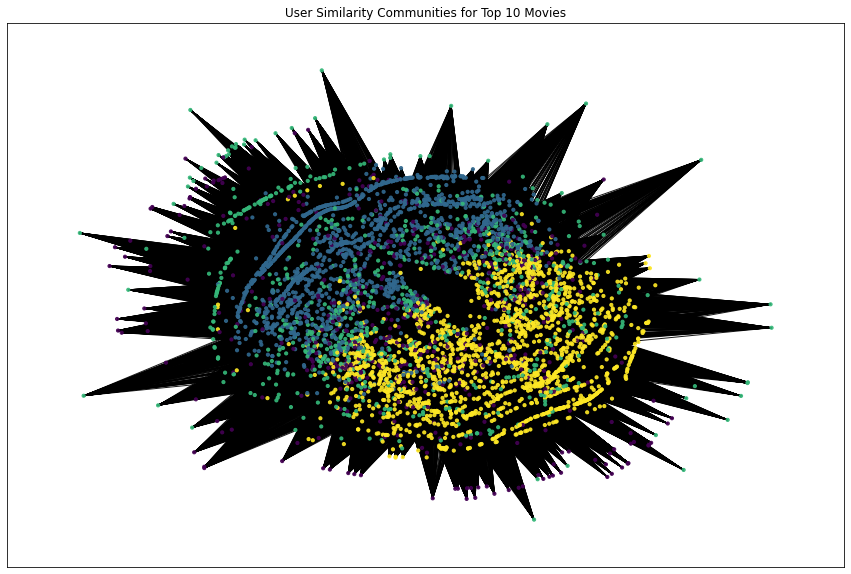

In [ ]:
plt.figure(figsize=(15, 10))
nx.draw_networkx_nodes(G, pos, node_color=colors, cmap=plt.cm.viridis, alpha=0.9, node_size=10)
nx.draw_networkx_edges(G, pos, alpha=0.9)
plt.title('User Similarity Communities for Top 10 Movies')
plt.show()

In [ ]:
# Print the nodes(users) and their assigned communities
for node, community_id in partition.items():
    print(f"Node {node}: Community {community_id}")

Node 2: Community 3
Node 3: Community 1
Node 4: Community 1
Node 5: Community 3
Node 8: Community 3
Node 9: Community 3
Node 10: Community 0
Node 11: Community 3
Node 12: Community 2
Node 13: Community 3
Node 15: Community 3
Node 17: Community 3
Node 18: Community 1
Node 19: Community 0
Node 22: Community 2
Node 23: Community 2
Node 24: Community 3
Node 25: Community 1
Node 26: Community 1
Node 27: Community 1
Node 28: Community 3
Node 29: Community 2
Node 30: Community 3
Node 32: Community 0
Node 33: Community 2
Node 34: Community 0
Node 35: Community 0
Node 36: Community 1
Node 39: Community 3
Node 40: Community 1
Node 41: Community 1
Node 42: Community 1
Node 44: Community 0
Node 45: Community 3
Node 47: Community 3
Node 48: Community 3
Node 49: Community 3
Node 51: Community 3
Node 52: Community 3
Node 53: Community 2
Node 54: Community 1
Node 55: Community 3
Node 56: Community 3
Node 57: Community 1
Node 58: Community 2
Node 59: Community 2
Node 62: Community 2
Node 64: Community 

In [ ]:
communities = {}
for user, community_id in partition.items():
    if community_id not in communities:
        communities[community_id] = []
    communities[community_id].append(user)

print("Communities:")
for community_id, members in communities.items():
    print(f"Community {community_id}: {members}")
    print(f"Number of members: {len(members)}")


Communities:
Community 3: [2, 5, 8, 9, 11, 13, 15, 17, 24, 28, 30, 39, 45, 47, 48, 49, 51, 52, 55, 56, 67, 80, 82, 88, 89, 90, 92, 95, 96, 98, 99, 100, 110, 111, 113, 120, 124, 127, 133, 137, 144, 147, 148, 150, 151, 156, 161, 171, 175, 181, 182, 184, 186, 189, 192, 197, 199, 201, 203, 204, 208, 212, 216, 217, 220, 224, 228, 229, 233, 234, 247, 249, 255, 257, 258, 266, 267, 275, 281, 287, 290, 291, 293, 295, 297, 298, 306, 309, 310, 314, 319, 329, 331, 332, 334, 335, 337, 338, 342, 346, 348, 349, 352, 355, 357, 368, 370, 375, 378, 379, 389, 395, 396, 400, 402, 404, 409, 411, 413, 414, 418, 419, 425, 426, 428, 429, 433, 437, 443, 444, 447, 450, 451, 452, 457, 467, 468, 478, 479, 480, 483, 486, 493, 498, 499, 500, 502, 507, 515, 516, 518, 520, 521, 528, 531, 533, 534, 543, 551, 558, 561, 564, 568, 570, 574, 578, 584, 590, 591, 593, 594, 595, 599, 603, 605, 607, 608, 610, 611, 613, 620, 626, 640, 646, 652, 654, 659, 660, 661, 663, 666, 668, 669, 673, 676, 677, 678, 680, 682, 686, 687, 693

# Task 3: Recommendation System
- A Recommendation system to suggest movies to users based on their past ratings.
- Collaborative filtering model using matrix factorization and evaluate its performance using RMSE on a split test set.

## EDA

In [ ]:
ratings_df['Rating'].value_counts()
# there is no missing ratings

4    348971
3    261197
5    226310
2    107557
1     56174
Name: Rating, dtype: int64

In [ ]:
# check out how many movies we got and their counts
movie_counts = ratings_df['MovieID'].value_counts()
len(movie_counts)

3706

In [ ]:
ratings_df['UserID'].value_counts().sort_values()
# There is no users with too less review, min is 10

3021      20
4628      20
2111      20
5525      20
1406      20
        ... 
1181    1521
1941    1595
4277    1743
1680    1850
4169    2314
Name: UserID, Length: 6040, dtype: int64

##  Item-Item Collaborative Filtering
we try finding movie's look-alike. Once we have movie's look-alike matrix, we can easily recommend alike movies to user who have rated any movie from the dataset.

This algorithm is far less resource consuming than user-user collaborative filtering. Hence, for a new user, the algorithm takes far lesser time than user-user collaborate as we don’t need all similarity scores between users.

weak point: with fixed number of movies, movie-movie look alike matrix is fixed over time.

The similarity metric we used here is
**Cosine Similarity:**

- Similarity is the cosine of the angle between the 2 vectors of the item vectors of A and B
- Closer the vectors, smaller will be the angle and larger the cosine

In [ ]:
sparsity = round(1.0 - len(ratings_df) / float(6040 * 3706), 3)
print('The sparsity level of MovieLens1M dataset is ' +  str(sparsity * 100) + '%')

The sparsity level of MovieLens1M dataset is 95.5%


In [ ]:
# Convert dataframe to sparse matrix
from scipy.sparse import csr_matrix
normalized_data = pd.DataFrame(normalized_data)
piv_sparse = csr_matrix(normalized_data)

user_similarity = cosine_similarity(piv_sparse)
movie_similarity = cosine_similarity(piv_sparse.T)


In [ ]:
user_sim_df = pd.DataFrame(user_similarity, index = normalized_data.index, columns = normalized_data.index)
user_sim_df.head()

In [ ]:
movie_similarity_df = pd.DataFrame(movie_similarity, index=normalized_data.columns, columns=normalized_data.columns)
movie_similarity_df.head()

In [ ]:
# get top N recommended movies to users based on their past ratings.
def top_movies_df_for_user(user_id, N=3706):
    user_ratings_df = pivot_table.loc[user_id, :]
    similar_scores = movie_similarity.dot(user_ratings_df)

    # Convert similar_scores to a Pandas Series
    similar_scores_series = pd.Series(similar_scores, index=user_ratings_df.index)

    # Get movies that the user has not yet rated (rating == 0) = not seen yet
    unrated_movies = user_ratings_df[user_ratings_df == 0].index
    rated_movies = user_ratings_df[user_ratings_df != 0].index

    # Filter similar scores for unrated movies
    recommended_movies = similar_scores_series[unrated_movies]

    # Sort movies_df by similarity score
    top_movies_df = recommended_movies.sort_values(ascending=False).index[:N]
    return top_movies_df, rated_movies


In [ ]:
user_id = 2
recommended_movies_df, rated_movies = top_movies_df_for_user(user_id)
print(f"Top 5 recommended movies_df for User {user_id}:", recommended_movies_df)


In [ ]:
# get Title and Genres for a list of MovieIDs
def get_movie_info(movie_ids, df):
    result_df = df[df['MovieID'].isin(movie_ids)][['MovieID', 'Title', 'Genres']]
    return result_df
recommended_movies_df = get_movie_info(recommended_movies_df, movies_df)
recommended_movies_df

In [ ]:
# Check recommended Movies Genres
recommended_movies_df['Genres'].value_counts()[:5]

In [ ]:
# Get rated Movies
rated_movies_df = get_movie_info(rated_movies, movies_df)
rated_movies_df

In [ ]:
# Check Rated Movies Genres
rated_movies_df['Genres'].value_counts()[:5]

In [ ]:
from sklearn.model_selection import train_test_split

# ratings_df.drop('Timestamp', inplace = True, axis = 1)
# Split the data into training and testing sets
train_data, test_data = train_test_split(ratings_df, test_size=0.2)

# Check their shape
print(train_data.shape)
print(test_data.shape)


In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Function to calculate RMSE
def rmse(pred, actual):
    pred = pred.values[actual.values.nonzero()].flatten()
    actual = actual.values[actual.values.nonzero()].flatten()
    return sqrt(mean_squared_error(pred, actual))

In [ ]:
# Predict ratings on the training data with both similarity score
item_prediction = train_data.dot(movie_similarity) / np.array([np.abs(movie_similarity).sum(axis=1)])

# RMSE on the train data
print('Item-based CF RMSE: ' + str(rmse(item_prediction, train_data)))

Item-based CF RMSE: 1464.5604883038923


In [ ]:
# Predict ratings on the training data with both similarity score
item_prediction = train_data.dot(movie_similarity) / np.array([np.abs(movie_similarity).sum(axis=1)])

# RMSE on the test data
print('Item-based CF RMSE: ' + str(rmse(item_prediction, test_data)))

Item-based CF RMSE: 1796.497707422237


## Model-Based Collaborative Filtering
*Model-based Collaborative Filtering* is based on *matrix factorization (MF)* which has received greater exposure, mainly as an unsupervised learning method for latent variable decomposition and dimensionality reduction. Matrix factorization is widely used for recommender systems where it can deal better with scalability and sparsity than Memory-based CF:

* The goal of MF is to learn the latent preferences of users and the latent attributes of items from known ratings (learn features that describe the characteristics of ratings) to then predict the unknown ratings through the dot product of the latent features of users and items.
* When you have a very sparse matrix, with a lot of dimensions, by doing matrix factorization, you can restructure the user-item matrix into low-rank structure, and you can represent the matrix by the multiplication of two low-rank matrices, where the rows contain the latent vector.
* You fit this matrix to approximate your original matrix, as closely as possible, by multiplying the low-rank matrices together, which fills in the entries missing in the original matrix.

For example, let's check the sparsity of the ratings dataset:

In [ ]:

# Load Reader library
reader = Reader()
from surprise import Dataset
from surprise.model_selection import train_test_split

# Load your dataset using Surprise
# For example, assuming you have a Pandas DataFrame df with columns 'user', 'item', and 'rating'
data = Dataset.load_from_df(ratings_df, reader)

# Split the dataset into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)


In [ ]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import accuracy

# Assuming you have a Pandas DataFrame df with columns 'user', 'item', and 'rating'
reader = Reader()
data = Dataset.load_from_df(ratings_df, reader)

# Split the dataset into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

# Use the SVD algorithm
svd = SVD()

# Train the model on the training set
svd.fit(trainset)

# Make predictions on the test set
predictions = svd.test(testset)

# Compute and print RMSE
rmse = accuracy.rmse(predictions)
print(f'RMSE: {rmse}')


RMSE: 0.8725
RMSE: 0.8724806770205257


In [ ]:
svd.predict(1310, 1994)

Prediction(uid=1310, iid=1994, r_ui=None, est=3.7123806454900166, details={'was_impossible': False})

In [ ]:
movies_df[movies_df['MovieID'] == 1994]

,MovieID,Title,Genres
1925,1994,Poltergeist (1982),Horror|Thriller


In [ ]:
get_movie_info(ratings_df[ratings_df['UserID'] == 1310]['MovieID'], movies_df)#['Genres'].value_counts()

,MovieID,Title,Genres
142,144,"Brothers McMullen, The (1995)",Comedy
1074,1090,Platoon (1986),Drama|War
1081,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi
1168,1185,My Left Foot (1989),Drama
1178,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Drama|Sci-Fi|War
1212,1231,"Right Stuff, The (1983)",Drama
1273,1293,Gandhi (1982),Drama
1275,1295,"Unbearable Lightness of Being, The (1988)",Drama
1279,1299,"Killing Fields, The (1984)",Drama|War
1322,1343,Cape Fear (1991),Thriller
